In [61]:
import pandas as pd
from nixtla import NixtlaClient
import os
import pandas as pd
# import torch
# from transformers import GPT2Model, GPT2Config, AdamW
from sklearn.preprocessing import StandardScaler
# from torch.utils.data import Dataset, DataLoader

In [62]:
# Get your API Key at dashboard.nixtla.io

# Set the directory for the '1-Savanna Preserve' folder
folder_path = r'../Competition Data/Data/1-Savanna_Preserve/'

# 1. Instantiate the NixtlaClient
api_key = 'nixak-2LCbrvDu8uh6uONR7nnoU8L8i0B0ZR2UOpdNfiBnZs4S5vdFe73JXyDGz7r15mABHL5H7Xvmva2oCbXd'

nixtla_client = NixtlaClient(api_key = api_key)

# Load the datasets
X_train = pd.read_csv(os.path.join(folder_path, '1_X_train.csv'))
y_train = pd.read_csv(os.path.join(folder_path, '1_y_train.csv'))

# Combine X and y for easier analysis
train_data = pd.merge(X_train, y_train, on=['date'])
train_data=train_data.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'location_id_x', 'location_id_y'])
# train_data_total = train_data.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
train_data.head()


,date,temperature_2m_previous_day1,temperature_2m_previous_day2,temperature_2m_previous_day3,temperature_2m_previous_day4,temperature_2m_previous_day5,temperature_2m_previous_day6,temperature_2m_previous_day7,relative_humidity_2m_previous_day1,relative_humidity_2m_previous_day2,relative_humidity_2m_previous_day3,relative_humidity_2m_previous_day4,relative_humidity_2m_previous_day5,relative_humidity_2m_previous_day6,relative_humidity_2m_previous_day7,temperature_2m,relative_humidity_2m
0,2024-02-01 00:00:00+00:00,18.947000,18.897000,18.497,17.296999,17.546999,16.947000,16.845499,94.0,95.0,95.0,96.0,88.0,91.0,90.0,18.796999,91.0
1,2024-02-01 01:00:00+00:00,18.546999,18.647000,17.347,16.447000,16.597000,16.047000,16.245500,96.0,95.0,97.0,96.0,91.0,91.0,91.0,18.347000,94.0
2,2024-02-01 02:00:00+00:00,18.046999,18.447000,16.597,15.646999,15.646999,15.396999,15.495500,98.0,96.0,97.0,94.0,93.0,90.0,93.0,17.847000,96.0
3,2024-02-01 03:00:00+00:00,17.647000,17.796999,15.747,15.497000,15.447000,15.347000,15.345500,99.0,98.0,96.0,92.0,93.0,88.0,93.0,17.597000,96.0
4,2024-02-01 04:00:00+00:00,17.046999,17.347000,15.047,16.397000,16.447000,16.296999,16.295500,100.0,98.0,94.0,89.0,89.0,85.0,90.0,17.347000,98.0


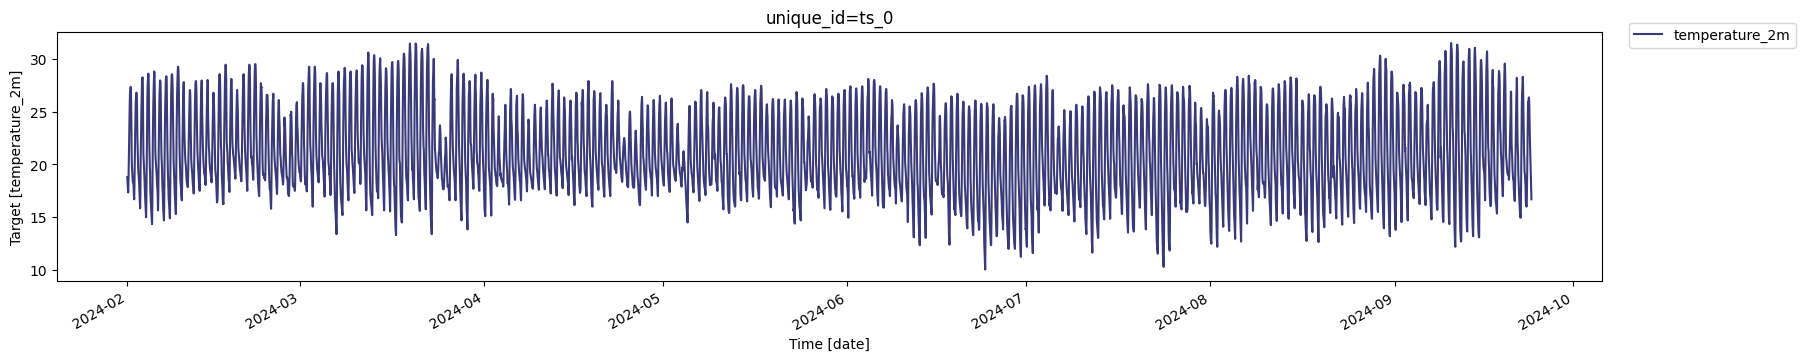

In [63]:
nixtla_client.plot(train_data, time_col='date', target_col='temperature_2m')

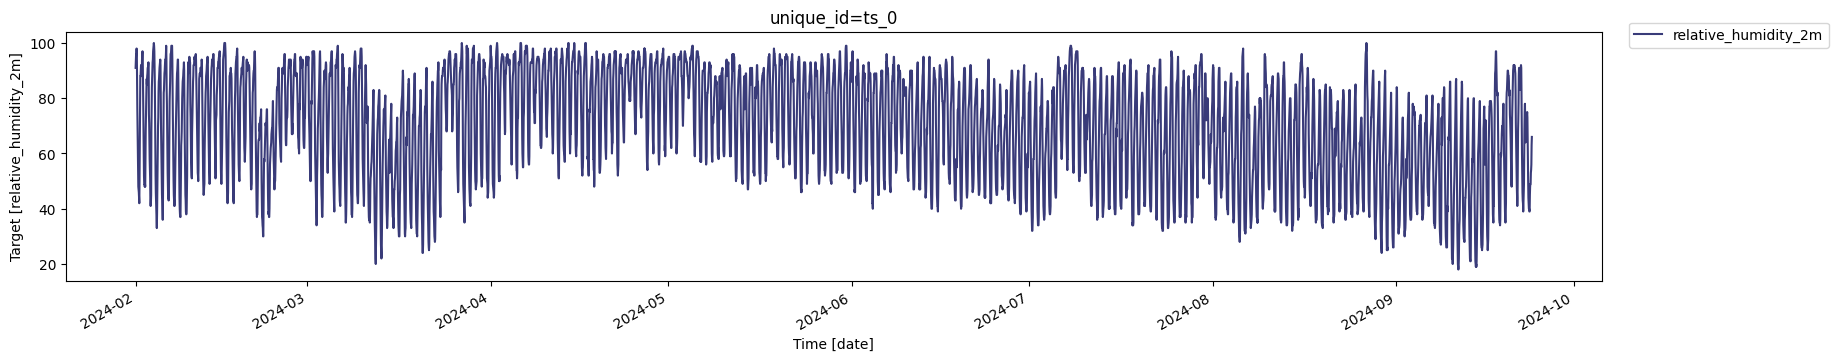

In [64]:
nixtla_client.plot(train_data, time_col='date', target_col='relative_humidity_2m')

In [68]:

# NOTE: The number of rows for future_xdf must equal the horizon length

future_xdf = train_data.drop(columns = ['temperature_2m'])#, 'relative_humidity_2m'])
future_xdf = future_xdf.query("date >= '2024-08-23 23:00:00+00:00' & date <= '2024-09-23 23:00:00+00:00'")

# Ensure 'date' is in datetime format
future_xdf['date'] = pd.to_datetime(future_xdf['date'])

print(future_xdf.columns)

# Forecast
forecast_df = nixtla_client.forecast(
    df=train_data, 
    X_df=future_xdf,
    h=24,
    id_col='location_id',
    target_col='temperature_2m',
    time_col='date'
)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...


Index(['date', 'temperature_2m_previous_day1', 'temperature_2m_previous_day2',
       'temperature_2m_previous_day3', 'temperature_2m_previous_day4',
       'temperature_2m_previous_day5', 'temperature_2m_previous_day6',
       'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1',
       'relative_humidity_2m_previous_day2',
       'relative_humidity_2m_previous_day3',
       'relative_humidity_2m_previous_day4',
       'relative_humidity_2m_previous_day5',
       'relative_humidity_2m_previous_day6',
       'relative_humidity_2m_previous_day7', 'relative_humidity_2m'],
      dtype='object')


INFO:nixtla.nixtla_client:Using historical exogenous features: ['temperature_2m_previous_day1', 'temperature_2m_previous_day2', 'temperature_2m_previous_day3', 'temperature_2m_previous_day4', 'temperature_2m_previous_day5', 'temperature_2m_previous_day6', 'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1', 'relative_humidity_2m_previous_day2', 'relative_humidity_2m_previous_day3', 'relative_humidity_2m_previous_day4', 'relative_humidity_2m_previous_day5', 'relative_humidity_2m_previous_day6', 'relative_humidity_2m_previous_day7', 'relative_humidity_2m']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['temperature_2m_previous_day1', 'temperature_2m_previous_day2', 'temperature_2m_previous_day3', 'temperature_2m_previous_day4', 'temperature_2m_previous_day5', 'temperature_2m_previous_day6', 'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1', 'relative_humidity_2m_previous_day2', 'relative_humidity_2m_previous_day3', 'relative_humidity_2m_previous_day4', 'relative_humidity_2m_previous_day5', 'relative_humidity_2m_previous_day6', 'relative_humidity_2m_previous_day7', 'relative_humidity_2m']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


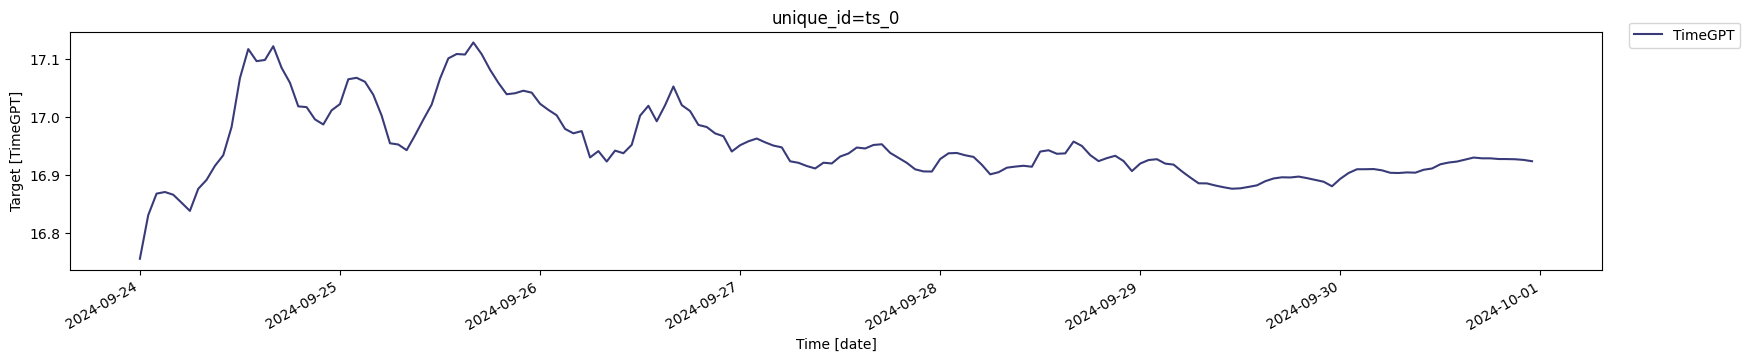

In [77]:

## Historical Exogeneous
# Forecast
forecast_df = nixtla_client.forecast(
    df=train_data, 
    h=168,
    finetune_steps=50,
    id_col='location_id',
    target_col='temperature_2m',
    time_col='date'
)
nixtla_client.plot(forecast_df, time_col='date', target_col='TimeGPT')

In [35]:
print(f"Number of rows in future_xdf: {future_xdf.shape[0]}")

Number of rows in future_xdf: 745


In [36]:
print(future_xdf.columns)

Index(['date', 'temperature_2m_previous_day1', 'temperature_2m_previous_day2',
       'temperature_2m_previous_day3', 'temperature_2m_previous_day4',
       'temperature_2m_previous_day5', 'temperature_2m_previous_day6',
       'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1',
       'relative_humidity_2m_previous_day2',
       'relative_humidity_2m_previous_day3',
       'relative_humidity_2m_previous_day4',
       'relative_humidity_2m_previous_day5',
       'relative_humidity_2m_previous_day6',
       'relative_humidity_2m_previous_day7'],
      dtype='object')


In [37]:
# train_data = train_data_total.query("date < '2024-08-23 23:00:00+00:00' ")

# train_data.tail(10)

In [38]:
print(train_data.columns)

Index(['date', 'temperature_2m_previous_day1', 'temperature_2m_previous_day2',
       'temperature_2m_previous_day3', 'temperature_2m_previous_day4',
       'temperature_2m_previous_day5', 'temperature_2m_previous_day6',
       'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1',
       'relative_humidity_2m_previous_day2',
       'relative_humidity_2m_previous_day3',
       'relative_humidity_2m_previous_day4',
       'relative_humidity_2m_previous_day5',
       'relative_humidity_2m_previous_day6',
       'relative_humidity_2m_previous_day7', 'temperature_2m',
       'relative_humidity_2m'],
      dtype='object')


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Querying model metadata...


INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['temperature_2m_previous_day1', 'temperature_2m_previous_day2', 'temperature_2m_previous_day3', 'temperature_2m_previous_day4', 'temperature_2m_previous_day5', 'temperature_2m_previous_day6', 'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1', 'relative_humidity_2m_previous_day2', 'relative_humidity_2m_previous_day3', 'relative_humidity_2m_previous_day4', 'relative_humidity_2m_previous_day5', 'relative_humidity_2m_previous_day6', 'relative_humidity_2m_previous_day7', 'relative_humidity_2m']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['temperature_2m_previous_day1', 'temperature_2m_previous_day2', 'temperature_2m_previous_day3', 'temperature_2m_previous_day4', 'temperature_2m_prev

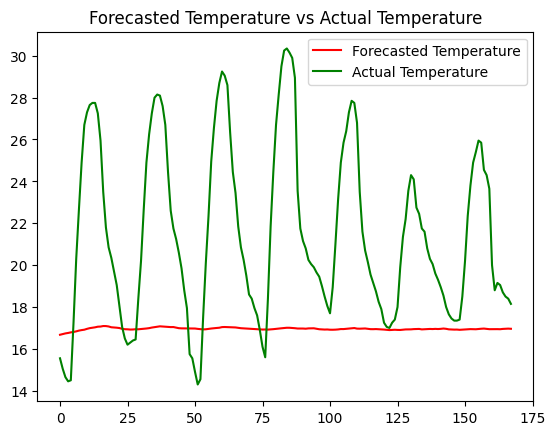

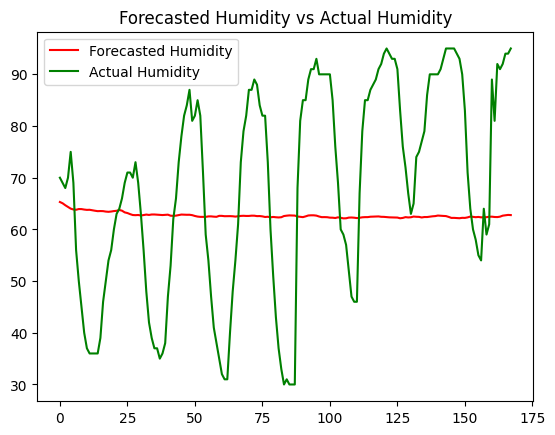

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['temperature_2m_previous_day1', 'temperature_2m_previous_day2', 'temperature_2m_previous_day3', 'temperature_2m_previous_day4', 'temperature_2m_previous_day5', 'temperature_2m_previous_day6', 'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1', 'relative_humidity_2m_previous_day2', 'relative_humidity_2m_previous_day3', 'relative_humidity_2m_previous_day4', 'relative_humidity_2m_previous_day5', 'relative_humidity_2m_previous_day6', 'relative_humidity_2m_previous_day7', 'relative_humidity_2m']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


KeyboardInterrupt: 

In [39]:
import matplotlib.pyplot as plt
# Configuration
h_lim = 168  # 7 days
fine_tune = True
set_finetune_steps = 50


# Ensure 'date' is in datetime format
train_data['date'] = pd.to_datetime(train_data['date'])


# Include all relevant columns (like temperature and humidity from previous days) in the input
input_columns = [
    'date', 'temperature_2m_previous_day1', 'temperature_2m_previous_day2',
    'temperature_2m_previous_day3', 'temperature_2m_previous_day4', 'temperature_2m_previous_day5',
    'temperature_2m_previous_day6', 'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1',
    'relative_humidity_2m_previous_day2', 'relative_humidity_2m_previous_day3', 'relative_humidity_2m_previous_day4',
    'relative_humidity_2m_previous_day5', 'relative_humidity_2m_previous_day6', 'relative_humidity_2m_previous_day7',
    'temperature_2m', 'relative_humidity_2m'
]

# Select these columns from the combined training data
train_data = train_data[input_columns]

# Temperature inference
timegpt_fcst_df_temperature = nixtla_client.forecast(
    df=train_data, h=h_lim, freq='h',
    time_col='date', target_col='temperature_2m', model='timegpt-1-long-horizon'
)
timegpt_fcst_df_temperature["date"]= pd.to_datetime(timegpt_fcst_df_temperature["date"], utc=True)

# Humidity inference
timegpt_fcst_df_humidity = nixtla_client.forecast(
    df=train_data, h=h_lim, freq='h',
    time_col='date', target_col='relative_humidity_2m', model='timegpt-1-long-horizon'
)

timegpt_fcst_df_humidity["date"]= pd.to_datetime(timegpt_fcst_df_temperature["date"], utc=True)

# Load the test data
# Load the datasets
X_test = pd.read_csv(os.path.join(folder_path, '1_X_test.csv'))
y_test = pd.read_csv(os.path.join(folder_path, '1_y_test.csv'))

# Combine X and y for easier analysis
test_data = pd.merge(X_test, y_test, on=['date'])

# Include all relevant columns (like temperature and humidity from previous days) in the input
input_col = [
    'date', 'temperature_2m_previous_day1', 'temperature_2m_previous_day2',
    'temperature_2m_previous_day3', 'temperature_2m_previous_day4', 'temperature_2m_previous_day5',
    'temperature_2m_previous_day6', 'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1',
    'relative_humidity_2m_previous_day2', 'relative_humidity_2m_previous_day3', 'relative_humidity_2m_previous_day4',
    'relative_humidity_2m_previous_day5', 'relative_humidity_2m_previous_day6', 'relative_humidity_2m_previous_day7',
    'temperature_2m', 'relative_humidity_2m'
]

# Select these columns from the combined training data
test_data = test_data[input_col]

df_test = test_data
# df_test = pd.read_csv(os.path.join(folder_path, '1_y_test.csv'))

# Convert 'date' column to datetime format
df_test['date'] = pd.to_datetime(df_test['date'], utc=True)

# Combine test data with forecasts for validation
dF_valid = pd.merge(df_test, timegpt_fcst_df_temperature, on=['date'], how='inner')
dF_valid = pd.merge(dF_valid, timegpt_fcst_df_humidity, on=['date'], how='inner')

# Plot temperature results
plt.plot(dF_valid['TimeGPT_x'], 'r', label='Forecasted Temperature')
plt.plot(dF_valid['temperature_2m'], 'g', label='Actual Temperature')
plt.legend()
plt.title('Forecasted Temperature vs Actual Temperature')
plt.show()

# Plot humidity results
plt.plot(dF_valid['TimeGPT_y'], 'r', label='Forecasted Humidity')
plt.plot(dF_valid['relative_humidity_2m'], 'g', label='Actual Humidity')
plt.legend()
plt.title('Forecasted Humidity vs Actual Humidity')
plt.show()



if False: # plot of raw difference for each day
    dF_valid['Diff'] = dF_valid['temperature_2m'] - dF_valid['TimeGPT_x']
    plt.plot(dF_valid['Diff'])
    plt.show

#================================================================
# Main -Fine tuning
#================================================================

if fine_tune:
    # Perfrom fine tuning  
    """
    control the number of steps with finetune_steps
    Note: may need different values for the temp vs humidity
    """

    timegpt_fcst_finetune_df_temperature = nixtla_client.forecast(
        df=train_data, h=h_lim, finetune_steps=set_finetune_steps,
        time_col='date', target_col='temperature_2m',
        model='timegpt-1-long-horizon'
    )

    timegpt_fcst_finetune_df_humidity = nixtla_client.forecast(
        df=train_data, h=h_lim, finetune_steps=set_finetune_steps,
        time_col='date', target_col='relative_humidity_2m',
        model='timegpt-1-long-horizon'
    )

    timegpt_fcst_finetune_df_temperature["date"] = pd.to_datetime(timegpt_fcst_finetune_df_temperature["date"], utc=True)
    
    timegpt_fcst_finetune_df_humidity["date"] = pd.to_datetime(timegpt_fcst_finetune_df_humidity["date"], utc=True)
    
    
    # Load the test data 
    X_test = pd.read_csv(os.path.join(folder_path, '1_X_test.csv'))
    y_test = pd.read_csv(os.path.join(folder_path, '1_y_test.csv'))

    # Combine X and y for easier analysis
    test_data = pd.merge(X_test, y_test, on=['date'])
    df_test = test_data
    # Include all relevant columns (like temperature and humidity from previous days) in the input
    input_col = [
    'date', 'temperature_2m_previous_day1', 'temperature_2m_previous_day2',
    'temperature_2m_previous_day3', 'temperature_2m_previous_day4', 'temperature_2m_previous_day5',
    'temperature_2m_previous_day6', 'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1',
    'relative_humidity_2m_previous_day2', 'relative_humidity_2m_previous_day3', 'relative_humidity_2m_previous_day4',
    'relative_humidity_2m_previous_day5', 'relative_humidity_2m_previous_day6', 'relative_humidity_2m_previous_day7',
    'temperature_2m', 'relative_humidity_2m'
    ]

    # Select these columns from the combined training data
    test_data = test_data[input_col]
    df_test = test_data
    # df_test = pd.read_csv(os.path.join(folder_path, '1_y_test.csv'))


    # Convert to datetime format
    df_test['date'] = pd.to_datetime(df_test['date'], utc=True)

    # Combine X and y for easier analysis
    dF_valid = pd.merge(df_test, timegpt_fcst_finetune_df_temperature, on=['date'])
    
    dF_valid = pd.merge(dF_valid, timegpt_fcst_finetune_df_humidity, on=['date'])
    print(dF_valid)

    plt.plot(dF_valid['TimeGPT_x'], 'r', label ='Forecasted Temperature')
    plt.plot(dF_valid['temperature_2m'], 'b', label ='Actual Temperature')
    plt.legend()
    plt.title('Fine-Tuned Forecasted Temperature vs Actual Temperature')
    plt.show()

    plt.plot(dF_valid['TimeGPT_y'], 'r', label ='Forecasted Humidity')
    plt.plot(dF_valid['relative_humidity_2m'], 'b', label ='Actual Humidity')
    plt.legend()
    plt.title('Fine-Tuned Forecasted Humidity vs Actual Humidity')
    plt.show()


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Using future exogenous features: ['temperature_2m_previous_day1', 'temperature_2m_previous_day2', 'temperature_2m_previous_day3', 'temperature_2m_previous_day4', 'temperature_2m_previous_day5', 'temperature_2m_previous_day6', 'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1', 'relative_humidity_2m_previous_day2', 'relative_humidity_2m_previous_day3', 'relative_humidity_2m_previous_day4', 'relative_humidity_2m_previous_day5', 'relative_humidity_2m_previous_day6', 'relative_humidity_2m_previous_day7', 'relative_humidity_2m']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['temperature_2m_pre

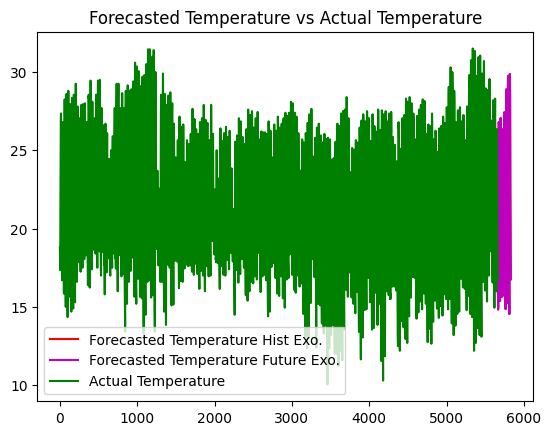

In [91]:
import matplotlib.pyplot as plt
# Configuration
h_lim = 168  # 7 days
fine_tune = True
set_finetune_steps = 50



# --- Loading and prepping training data --- # 

train_data['date'] = pd.to_datetime(train_data['date'])  # Ensure 'date' is in datetime format
# Include all relevant columns (like temperature and humidity from previous days) in the input
input_columns = [
    'date', 'temperature_2m_previous_day1', 'temperature_2m_previous_day2',
    'temperature_2m_previous_day3', 'temperature_2m_previous_day4', 'temperature_2m_previous_day5',
    'temperature_2m_previous_day6', 'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1',
    'relative_humidity_2m_previous_day2', 'relative_humidity_2m_previous_day3', 'relative_humidity_2m_previous_day4',
    'relative_humidity_2m_previous_day5', 'relative_humidity_2m_previous_day6', 'relative_humidity_2m_previous_day7',
    'temperature_2m', 'relative_humidity_2m'
]

# Select these columns from the combined training data
train_data = train_data[input_columns]

# --- Loading and prepping exogenous data --- # 

future_xdf = train_data.drop(columns = ['temperature_2m'])#, 'relative_humidity_2m'])

"""
# NOTE: The number of rows for future_xdf must equal the horizon length
"""


## Future Exogeneous - Temperature

future_xdf = future_xdf.query("date > '2024-08-23 23:00:00+00:00' & date <= '2024-08-30 23:00:00+00:00'") 
future_xdf['date'] = pd.to_datetime(future_xdf['date']) # Ensure 'date' is in datetime format

forecast_df_temp_futureexo = nixtla_client.forecast(
    df=train_data, 
    X_df=future_xdf,
    h=h_lim,
    id_col='location_id',
    target_col='temperature_2m',
    time_col='date',
    model='timegpt-1-long-horizon'
)

## Historical Exogeneous - Temperature
# Forecast
forecast_df_temp_histexo = nixtla_client.forecast(
    df=train_data, 
    h=h_lim,
    id_col='location_id',
    target_col='temperature_2m',
    time_col='date',
    model='timegpt-1-long-horizon'
)
fig = nixtla_client.plot(forecast_df_temp_futureexo, time_col='date', target_col='TimeGPT')

# Formatting time stamps
forecast_df_temp_histexo["date"]= pd.to_datetime(forecast_df_temp_histexo["date"], utc=True)
forecast_df_temp_futureexo["date"]= pd.to_datetime(forecast_df_temp_futureexo["date"], utc=True)

# Combine test data with forecasts for validation
dF_valid_forecast = pd.merge(train_data, forecast_df_temp_futureexo, on=['date'], how='outer')
# dF_valid = pd.merge(dF_valid, timegpt_fcst_df_humidity, on=['date'], how='inner')

# Plot temperature results
plt.plot(dF_valid_forecast['TimeGPT'], 'r', label='Forecasted Temperature Hist Exo.')
plt.plot(dF_valid_forecast['TimeGPT'], 'm', label='Forecasted Temperature Future Exo.')

plt.plot(dF_valid_forecast['temperature_2m'], 'g', label='Actual Temperature')
plt.legend()
plt.title('Forecasted Temperature vs Actual Temperature')
plt.show()


In [ ]:

#================================================================
# Main -Fine tuning
#================================================================

# Perfrom fine tuning  
"""
control the number of steps with finetune_steps
Note: may need different values for the temp vs humidity
"""

timegpt_fcst_finetune_df_temperature = nixtla_client.forecast(
    df=train_data, h=h_lim, finetune_steps=set_finetune_steps,
    time_col='date', target_col='temperature_2m',
    model='timegpt-1-long-horizon'
)

timegpt_fcst_finetune_df_humidity = nixtla_client.forecast(
    df=train_data, h=h_lim, finetune_steps=set_finetune_steps,
    time_col='date', target_col='relative_humidity_2m',
    model='timegpt-1-long-horizon'
)

timegpt_fcst_finetune_df_temperature["date"] = pd.to_datetime(timegpt_fcst_finetune_df_temperature["date"], utc=True)

timegpt_fcst_finetune_df_humidity["date"] = pd.to_datetime(timegpt_fcst_finetune_df_humidity["date"], utc=True)


# Load the test data 
X_test = pd.read_csv(os.path.join(folder_path, '1_X_test.csv'))
y_test = pd.read_csv(os.path.join(folder_path, '1_y_test.csv'))

# Combine X and y for easier analysis
test_data = pd.merge(X_test, y_test, on=['date'])
df_test = test_data
# Include all relevant columns (like temperature and humidity from previous days) in the input
input_col = [
'date', 'temperature_2m_previous_day1', 'temperature_2m_previous_day2',
'temperature_2m_previous_day3', 'temperature_2m_previous_day4', 'temperature_2m_previous_day5',
'temperature_2m_previous_day6', 'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1',
'relative_humidity_2m_previous_day2', 'relative_humidity_2m_previous_day3', 'relative_humidity_2m_previous_day4',
'relative_humidity_2m_previous_day5', 'relative_humidity_2m_previous_day6', 'relative_humidity_2m_previous_day7',
'temperature_2m', 'relative_humidity_2m'
]

# Select these columns from the combined training data
test_data = test_data[input_col]
df_test = test_data
# df_test = pd.read_csv(os.path.join(folder_path, '1_y_test.csv'))


# Convert to datetime format
df_test['date'] = pd.to_datetime(df_test['date'], utc=True)

# Combine X and y for easier analysis
dF_valid = pd.merge(df_test, timegpt_fcst_finetune_df_temperature, on=['date'])

dF_valid = pd.merge(dF_valid, timegpt_fcst_finetune_df_humidity, on=['date'])
print(dF_valid)

plt.plot(dF_valid['TimeGPT_x'], 'r', label ='Forecasted Temperature')
plt.plot(dF_valid['temperature_2m'], 'b', label ='Actual Temperature')
plt.legend()
plt.title('Fine-Tuned Forecasted Temperature vs Actual Temperature')
plt.show()

plt.plot(dF_valid['TimeGPT_y'], 'r', label ='Forecasted Humidity')
plt.plot(dF_valid['relative_humidity_2m'], 'b', label ='Actual Humidity')
plt.legend()
plt.title('Fine-Tuned Forecasted Humidity vs Actual Humidity')
plt.show()


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['temperature_2m_previous_day1', 'temperature_2m_previous_day2', 'temperature_2m_previous_day3', 'temperature_2m_previous_day4', 'temperature_2m_previous_day5', 'temperature_2m_previous_day6', 'temperature_2m_previous_day7', 'relative_humidity_2m_previous_day1', 'relative_humidity_2m_previous_day2', 'relative_humidity_2m_previous_day3', 'relative_humidity_2m_previous_day4', 'relative_humidity_2m_previous_day5', 'relative_humidity_2m_previous_day6', 'relative_humidity_2m_previous_day7', 'relative_humidity_2m']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Using future exogenous features: ['temperature_2m_pre

ApiError: status_code: 422, body: {'detail': [{'type': 'value_error', 'loc': ['body'], 'msg': 'Value error, X_future must contain 168 rows, which is horizon * n_series (168 * 1), but it has 169 rows.', 'ctx': {'error': {}}}], 'request_id': 'TZYQCCFFCP'}

In [17]:
import numpy as np, pandas as pd

# RMSSE calculation
def rmsse(train, test, forecast):
    forecast_mse = np.mean((test - forecast) ** 2, axis=0)
    train_mse = np.mean((np.diff(np.trim_zeros(train)) ** 2))
    return np.sqrt(forecast_mse / train_mse)

# Location 1 - Savanna Preserve
# data_src = '../1 - Savanna Preserve/' # location od case study files for evaluation
# y_train = pd.read_csv(os.path.join(folder_path, '1_y_train.csv'))
# test = pd.read_csv(data_src + '1_y_test.csv',index_col=0)
# # rmsse (last 31 days as train for scaling)
temp_rmsse = rmsse(y_train.values[-31*24:,3], dF_valid["temperature_2m"].values, dF_valid["TimeGPT_x"].values)
hum_rmsse = rmsse(y_train.values[-31*24:,4], dF_valid["relative_humidity_2m"].values, dF_valid["TimeGPT_y"].values)
# # overall rmsse
savanna_rmsse = (temp_rmsse + hum_rmsse) / 2

print(temp_rmsse, hum_rmsse, savanna_rmsse)

4.150904834429502 3.5531670538847395 3.852035944157121


In [18]:
y_train.values[-31*24:,2]

array(['2024-08-24 00:00:00+00:00', '2024-08-24 01:00:00+00:00',
       '2024-08-24 02:00:00+00:00', '2024-08-24 03:00:00+00:00',
       '2024-08-24 04:00:00+00:00', '2024-08-24 05:00:00+00:00',
       '2024-08-24 06:00:00+00:00', '2024-08-24 07:00:00+00:00',
       '2024-08-24 08:00:00+00:00', '2024-08-24 09:00:00+00:00',
       '2024-08-24 10:00:00+00:00', '2024-08-24 11:00:00+00:00',
       '2024-08-24 12:00:00+00:00', '2024-08-24 13:00:00+00:00',
       '2024-08-24 14:00:00+00:00', '2024-08-24 15:00:00+00:00',
       '2024-08-24 16:00:00+00:00', '2024-08-24 17:00:00+00:00',
       '2024-08-24 18:00:00+00:00', '2024-08-24 19:00:00+00:00',
       '2024-08-24 20:00:00+00:00', '2024-08-24 21:00:00+00:00',
       '2024-08-24 22:00:00+00:00', '2024-08-24 23:00:00+00:00',
       '2024-08-25 00:00:00+00:00', '2024-08-25 01:00:00+00:00',
       '2024-08-25 02:00:00+00:00', '2024-08-25 03:00:00+00:00',
       '2024-08-25 04:00:00+00:00', '2024-08-25 05:00:00+00:00',
       '2024-08-25 06:00: